Two Classes Diagonal Translation. 2 Dimensional data
10 batches of 76 instances



METHOD: Static lp as classifier
Execution time:  0.059863703703703704
Average MCC:  0.0
Average error: 50.528
Average macro-F1: 0.3344304388422035
Average micro-F1: 0.52
Average Accuracy:  49.472
Standard Deviation:  4.48826202444
Variance:  20.144496


C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:516: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(var_yt * var_yp)


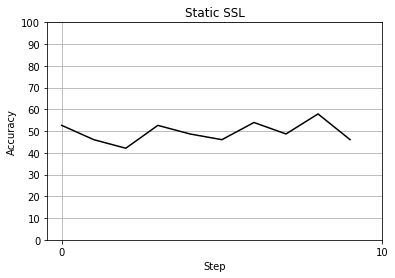

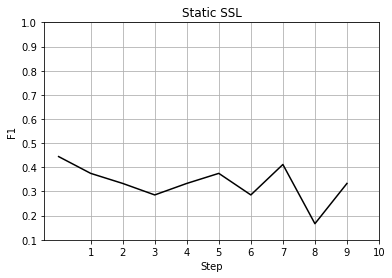

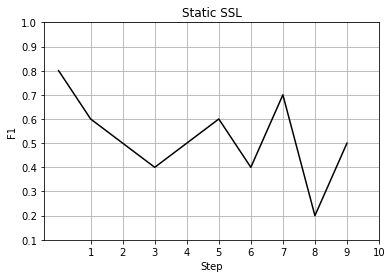




METHOD: Sliding lp as classifier
Execution time:  0.057116839506172745
Average MCC:  0.839675577768
Average error: 8.29
Average macro-F1: 0.9109090909090909
Average micro-F1: 0.95
Average Accuracy:  91.71
Standard Deviation:  13.2896042078
Variance:  176.61358


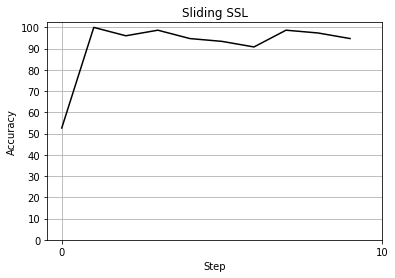

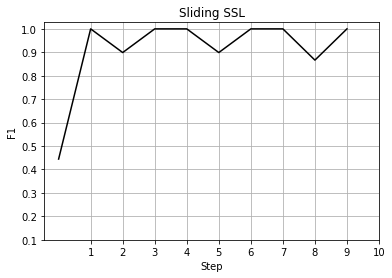

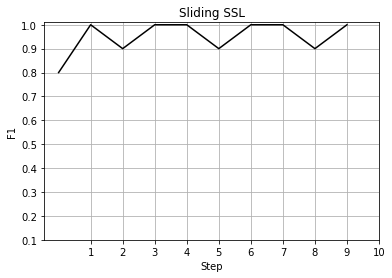




METHOD: Incremental lp as classifier
Execution time:  0.0973072592592592
Average MCC:  0.809553568329
Average error: 8.817
Average macro-F1: 0.8905339105339106
Average micro-F1: 0.93
Average Accuracy:  91.183
Standard Deviation:  13.092579616
Variance:  171.415641


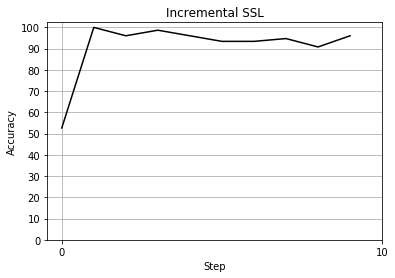

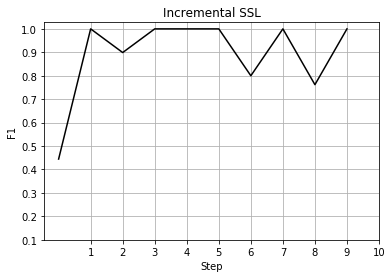

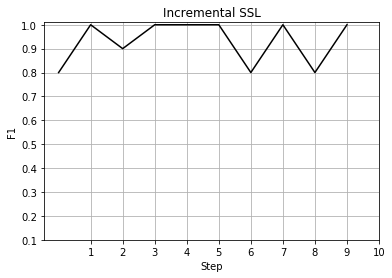




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  0.11060503703703706
Average MCC:  0.839675577768
Average error: 7.106
Average macro-F1: 0.9109090909090909
Average micro-F1: 0.95
Average Accuracy:  92.894
Standard Deviation:  13.5495625022
Variance:  183.590644


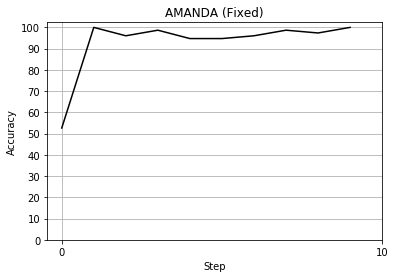

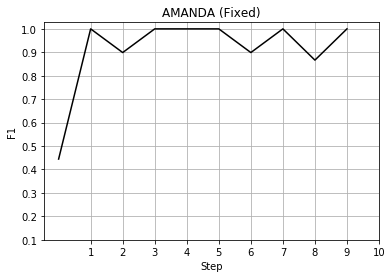

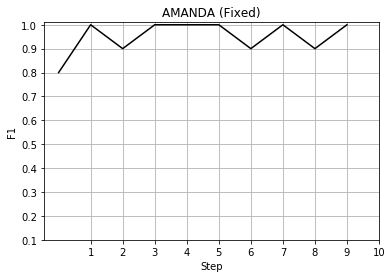




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  0.1623600987654319
Average MCC:  0.910144355426
Average error: 3.554
Average macro-F1: 0.9488089688089689
Average micro-F1: 0.95
Average Accuracy:  96.446
Standard Deviation:  1.56151977253
Variance:  2.438344


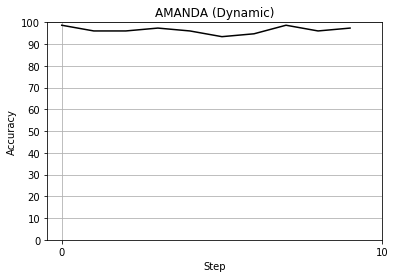

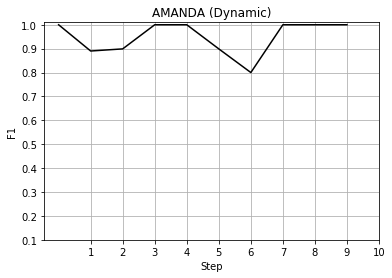

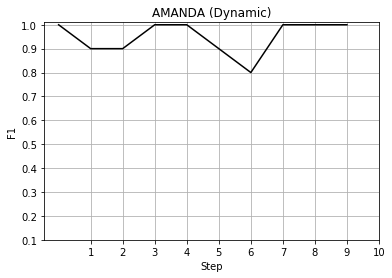




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  4.256493827160493
Average MCC:  0.881649658093
Average error: 6.843
Average macro-F1: 0.9343434343434343
Average micro-F1: 0.97
Average Accuracy:  93.157
Standard Deviation:  13.6082387178
Variance:  185.184161


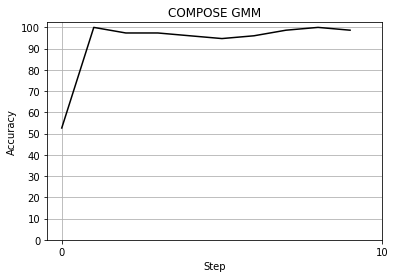

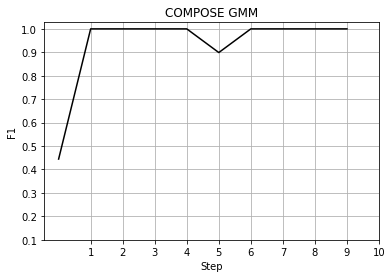

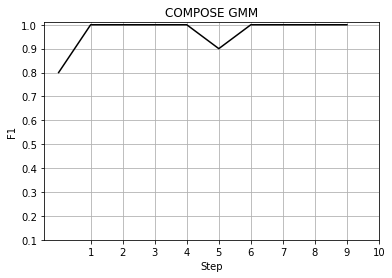

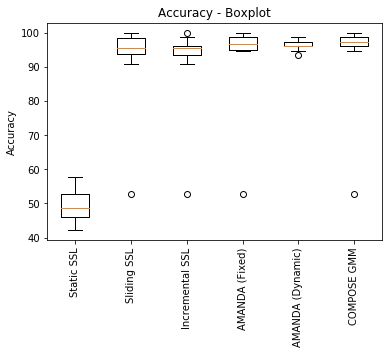

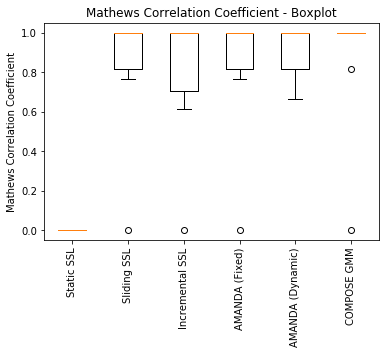

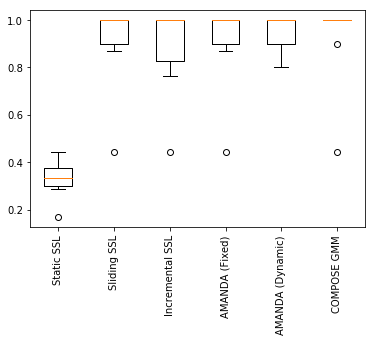

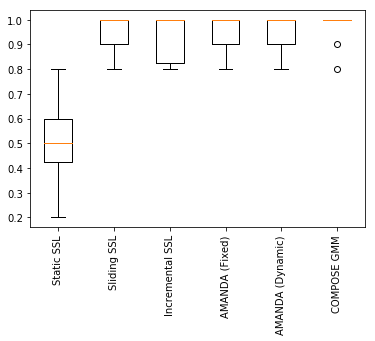

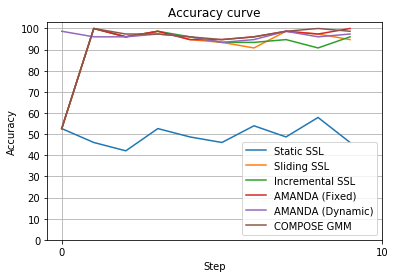

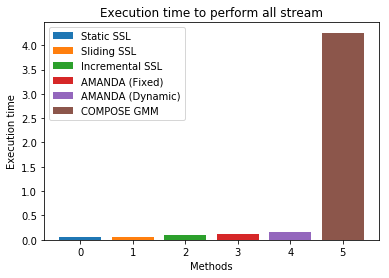

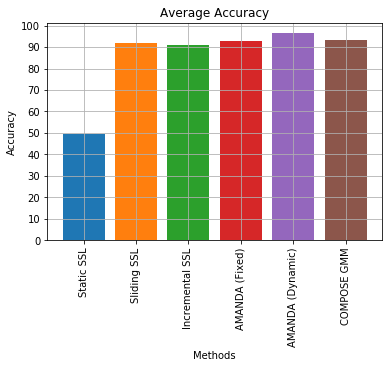

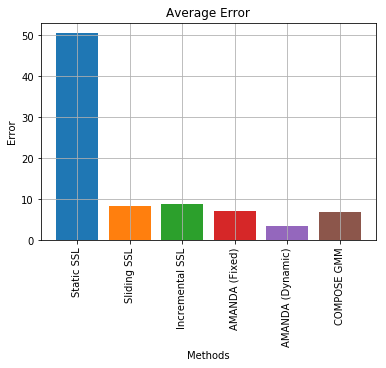

Error reduction: 85.3775873221
Error reduction: 84.3123382924
Error reduction: 87.7708602846
Error reduction: 94.9506791721
Error reduction: 88.3024741268


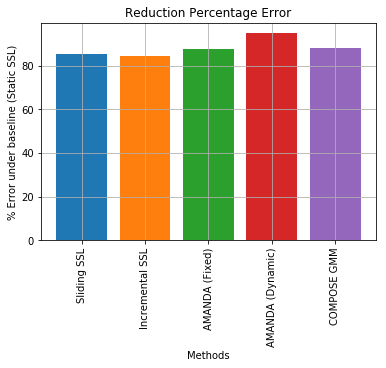

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version
from methods import prequential_amanda_fixed
from methods import prequential_amanda_dynamic
from methods import prequential_static_classifier
from methods import prequential_deslizante_LN
from methods import prequential_incremental_LN
from methods import prequential_compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, nb = naive bayes, knn = k-nn, sgd = stochastic gradient descent
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.load2CDT(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))
    '''
    # Static SSL
    experiments[0] = Experiment(static_classifier, 12, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 12, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 12, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 12, 0.75, "kde", clfName=sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 9, None, "kde", clfName=sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 12)
    '''
    
    #prequential evaluation
    steps = 10
    dataValues, dataLabels = dataValues[:labeledData], dataLabels[:labeledData]
    labeledData = int(0.05*len(dataLabels))
    experiments[0] = Experiment(prequential_static_classifier, 12, clfName=sslClassifier)
    experiments[1] = Experiment(prequential_deslizante_LN, 12, clfName=sslClassifier)
    experiments[2] = Experiment(prequential_incremental_LN, 12, clfName=sslClassifier)
    experiments[3] = Experiment(prequential_amanda_fixed, 12, 0.75, "kde", sslClassifier)
    experiments[4] = Experiment(prequential_amanda_dynamic, 9, None, "kde", clfName=sslClassifier)
    experiments[5] = Experiment(prequential_compose_gmm_version, 12, 0.75)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '2CDT', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw[:labeledData], "accuracies":originalAccsLevelIw[:labeledData], "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()